In [1]:
# Import of libraries
import random
import imageio
import numpy as np
from argparse import ArgumentParser

from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import einops
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader

from torchvision.transforms import Compose, ToTensor, Lambda
from torchvision.datasets.mnist import MNIST, FashionMNIST

%matplotlib widget

In [2]:
# Setting reproducibility
SEED = 0
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Definitions
STORE_PATH_MNIST = f"ddpm_model_mnist.pt"
STORE_PATH_FASHION = f"ddpm_model_fashion.pt"

In [5]:
batch_size = 4
fashion = False

In [6]:
store_path = "ddpm_fashion.pt" if fashion else "ddpm_mnist.pt"

In [7]:
# Loading the data and convert the images into a tensor and normalize them to [-1, 1]
transform = Compose([
    ToTensor(),
    Lambda(lambda x: (x - 0.5) * 2)
])
ds_fn = FashionMNIST if fashion else MNIST
dataset = ds_fn(root="./datasets", train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [65]:
def add_noise(image, title=""):
    """
    Adds noise to an image.
    """

    T = 100 + 1

    # Defining number of rows and columns
    fig = plt.figure(figsize=(10, 10))
    rows = int(T ** (1/2))
    cols = round(T / rows)



    betas = np.linspace(10**-4, 0.02, T - 1)
    print(betas.shape)

    # Populating figure with subplots
    idx = 0
    for r in range(rows):
        for c in range(cols):
            fig.add_subplot(rows, cols, idx + 1)
            
            if idx < T:
                if idx > 0:    
                    b = betas[idx - 1]
                    mean = np.dot(np.sqrt(1-b),image)
                    std = np.dot(b, np.identity(image.shape[0]))
                    
                    noise = np.random.normal(mean, 1, image.shape)
                    image = image + noise
                
                plt.imshow(image, cmap="gray")
                plt.axis("off")
                idx += 1
        
    fig.suptitle(title)

    plt.show()
    # plt.imshow(one_image, cmap="gray")
    # plt.imshow(one_image + noise, cmap="gray")
    # plt.show()
    return
    # return x + torch.randn_like(x) * noise_std

torch.Size([4, 1, 28, 28]) torch.Size([4])
(100,)


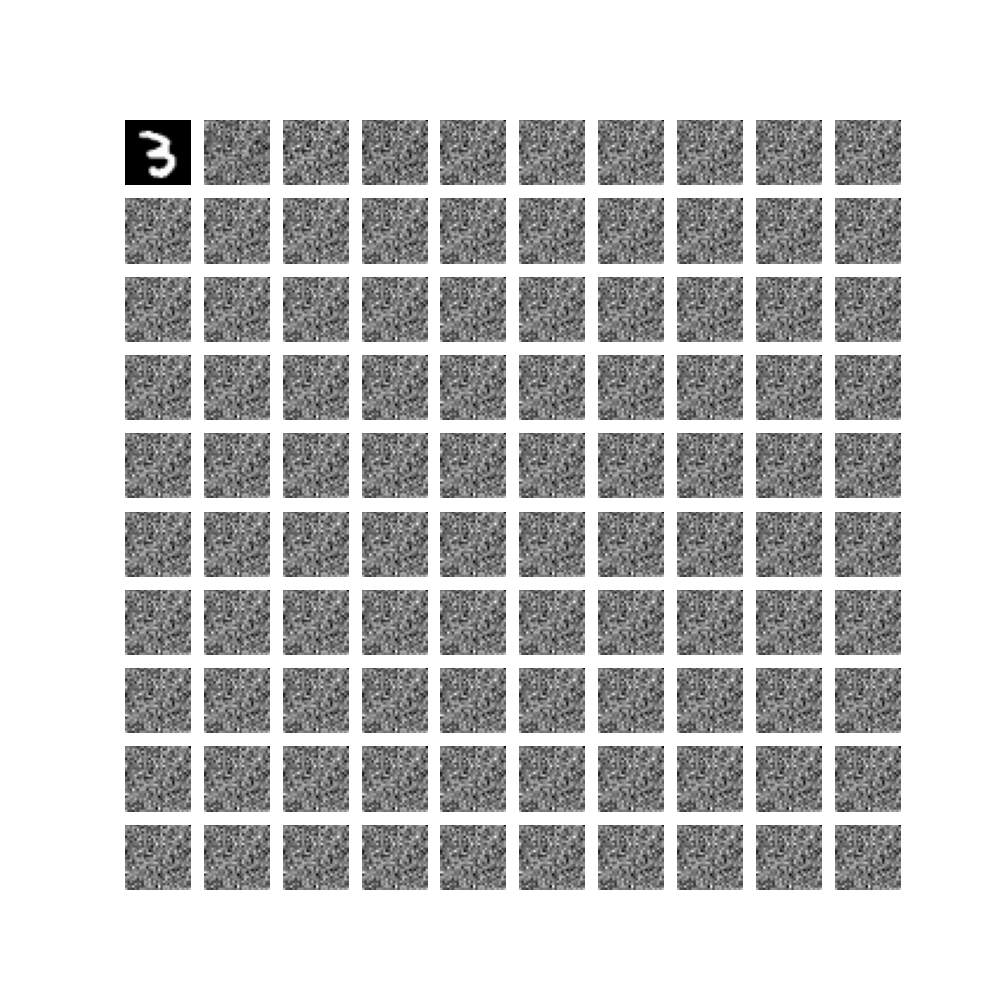

In [66]:
for x, y in loader:
    print(x.shape, y.shape)
    one_image = x[0, 0]
    add_noise(one_image)
    break